# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

Read in `soil_measures.csv` as a pandas DataFrame and perform some data checks, such as determining the number of crops, checking for missing values, and verifying that the data in each potential feature column is numeric.

In [2]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

print(crops.info())
print(crops.describe(include="all"))
print(crops.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None
                  N            P            K           ph  crop
count   2200.000000  2200.000000  2200.000000  2200.000000  2200
unique          NaN          NaN          NaN          NaN    22
top             NaN          NaN          NaN          NaN  rice
freq            NaN          NaN          NaN          NaN   100
mean      50.551818    53.362727    48.149091     6.469480   NaN
std       36.917334    32.985883    50.647931     0.773938   NaN
min        0.000000     5.000000     5.000000     3.504752   NaN
25%       21.000000    28.000000    20.000000  

Split the data into training and test sets, setting `test_size` equal to 20% and using a `random_state` of 42.

In [3]:
X = crops[['N', 'P', 'K', 'ph']]
y = crops["crop"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Predict the `"crop"` type using each feature individually by looping over all the features, and, for each feature, fit a Logistic Regression model and calculate `f1_score()`. When creating the model, set `max_iter` to 2000 so the model can converge, and pass an appropriate string value to the `multi_class` keyword argument.

In [4]:
for feat in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    log_reg.fit(X_train[[feat]], y_train)
    y_pred = log_reg.predict(X_test[[feat]])
    feature_performance = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score for {feat}: {feature_performance}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


In order to avoid selecting two features that are highly correlated, perform a correlation analysis for each pair of features, enabling you to build a final model without the presence of multicollinearity.

<AxesSubplot: >

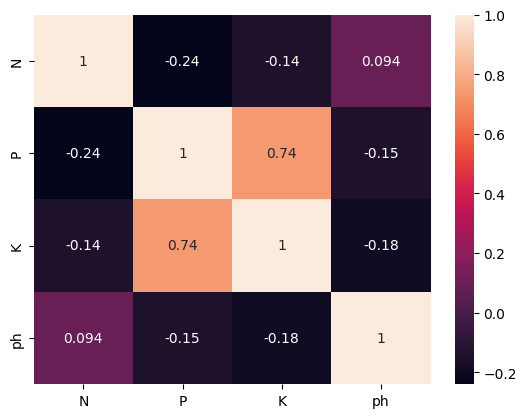

In [5]:
sns.heatmap(X_train.corr(), annot=True)

In [6]:
final_features = ["N", "K", "ph"]
X = crops[final_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Once you have your final features, train and test a new Logistic Regression model called `log_reg`, then evaluate performance using `f1_score()`, saving the metric as a variable called `model_performance`.

In [7]:
log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score for {feat}: {model_performance}")

F1-score for ph: 0.558010495235685
